In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

### import data

In [2]:
data = pd.read_csv('../../Data/backup/Compiled2014.csv')

In [3]:
data = data.fillna(0)

In [4]:
data = data.round(4)

In [5]:
train,test=train_test_split(data,test_size=0.1,random_state=567)

In [6]:
x_train = train.iloc[:,2:]
y_train = train.iloc[:,1]

x_test = test.iloc[:,2:]
y_test = test.iloc[:,1]

In [23]:
y_train.size

5259

In [24]:
y_test.size

585

### Decision Tree 

In [7]:
predictor = DecisionTreeRegressor(criterion='mse',max_leaf_nodes=5)

In [8]:
clf = predictor.fit(x_train,y_train)

In [35]:
y_trainpred = predictor.predict(x_train)
y_pred = predictor.predict(x_test)

In [36]:
score = mean_squared_error(y_test, y_pred)
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 1.78017581321
Test error 5.66982655405


In [11]:
tree_dot = export_graphviz(clf)

/Users/Yanbo/miniconda3/lib/python3.5/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


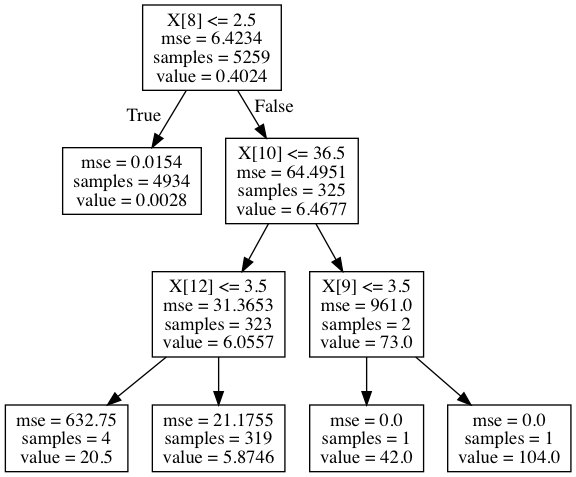

In [19]:
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [31]:
y_test.size

585

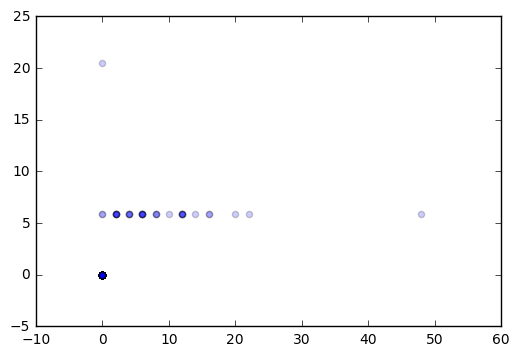

In [34]:
plt.scatter(y_test,y_pred,alpha=0.2)

### Random Forests 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.learning_curve import validation_curve

In [ ]:
Param_name = 'max_features'
Param_range = range(1,x.shape[1]+1)

for Forest, color, lable in [(RandomForestRegressor,'g','RF'), 
                             (ExtraTreesRegressor),'r','ETs']
_, test_scores = validation_curve(
    Forest(n_estimators=100, n_jobs=-1),x,y,
    cv=ShuttleSplit(n=len(x),n_iter=10, test_size=0.25),
    scoring='mean_squared_error')
test_scores_mean = np.mean(-test_scores, axis=1)
plt.plot(param_range, test_scores_mean, label=label, color=color)